In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import balanced_accuracy_score
import cv2
from imblearn.over_sampling import RandomOverSampler, SMOTE
import tensorflow as tf

# DADOS

In [2]:
xt = np.load("Dados/Xtrain_Classification1.npy") 
yt = np.load("Dados/ytrain_Classification1.npy")
xScaled =  (xt).astype('float32')/255.0

In [3]:
X_train, X_test, y_train, y_test = train_test_split(xScaled, yt, test_size=0.2, shuffle=True, random_state=10, stratify=yt)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=10,stratify=y_train)

# sm = SMOTE(random_state = 2) 
# X_train, y_train = sm.fit_resample(X_train, y_train) 

# Rodar imagens

In [4]:
X_testrs = X_test.reshape(-1, 28,28,3)
X_trainrs = X_train.reshape(-1, 28,28,3)
X_validationrs = X_validation.reshape(-1, 28,28,3)
# addx = np.array([])
# addy = np.array([]) 
# for idx, i in enumerate(y_train):
#         for l in range(3):
#             if l == 0:
#                 if not np.any(addx):
#                     addx = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
#                     addy = np.append(addy,i)
#                 else:
#                     aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
#                     addx = np.append(addx,aux,axis=0)
#                     addy = np.append(addy,i)
                   
#             elif l == 1:
#                 aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_CLOCKWISE), axis=0) 
#                 addx = np.append(addx,aux,axis=0)
#                 addy = np.append(addy,i)
            
#             elif l == 2:
#                 aux = np.expand_dims(cv2.rotate(X_trainrs[idx],  cv2.ROTATE_180), axis=0) 
#                 addx = np.append(addx,aux,axis=0)
#                 addy = np.append(addy,i)

# X_trainrs = np.append(X_trainrs,addx,axis=0) 
# y_train = np.append(y_train,addy)




In [5]:

X_trainrs = X_trainrs.reshape(-1, 28*28*3)  
oversample = RandomOverSampler(sampling_strategy='minority')
X_trainrs, y_train = oversample.fit_resample(X_trainrs, y_train)
X_trainrs = X_trainrs.reshape(-1, 28,28,3)
y_train = to_categorical(y_train,6)
y_validation = to_categorical(y_validation,6)
y_test = to_categorical(y_test,6)


# Apenas para ver as imagens

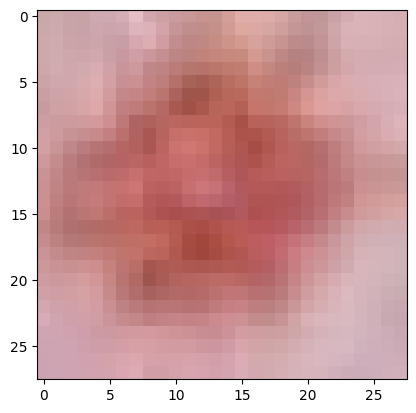

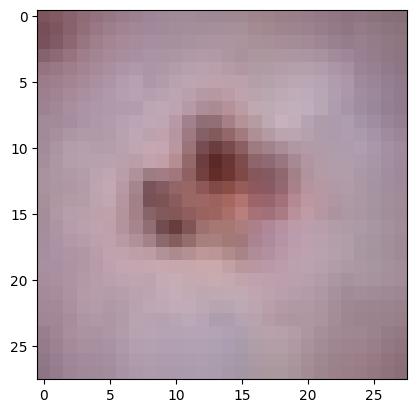

[[0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [6]:
img = X_trainrs
for i in img[-2:]:
    plt.imshow(i)
    plt.show()
print(y_train[-2:])

# CNN

In [7]:
CNN = Sequential()
CNN.add(Convolution2D(128, kernel_size = 3, activation='relu', input_shape=(28, 28, 3), padding='same'))
CNN.add(MaxPooling2D((2, 2), strides=2))
CNN.add(Convolution2D(128, kernel_size = 3, activation='relu', padding='same'))
CNN.add(MaxPooling2D((2, 2), strides=2))
CNN.add(Convolution2D(128, kernel_size = 7, activation='relu', padding='same'))
CNN.add(MaxPooling2D((2, 2), strides=2))
CNN.add(Flatten())
CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(64, activation='relu'))
CNN.add(Dropout(0.5))
CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(2, activation='softmax'))


# MLP

In [8]:
# MLP = Sequential()
# MLP.add(Dense(64,input_dim=28*28*3, activation='relu'))
# MLP.add(Dense(32, activation='relu'))
# MLP.add(Dense(2, activation='softmax'))
# X_trainrs = X_train.reshape(-1, 28*28*3)
# X_validationrs = X_validation
# X_testrs = X_test

In [9]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         802944    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

# Fit

In [10]:
# lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.8,
#     patience=4,
#     min_lr=0.0001
# )
CNN.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
Early_callback = EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1, restore_best_weights=True, min_delta=0.0001)
hist = CNN.fit(x=X_trainrs, y=y_train, epochs=100, validation_data=(X_validationrs, y_validation), verbose=2, batch_size=1000, callbacks=[Early_callback])

Epoch 1/100


ValueError: in user code:

    File "c:\Users\rodsc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\rodsc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\rodsc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\rodsc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\rodsc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\rodsc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\rodsc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\rodsc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\rodsc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\rodsc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 6) and (None, 2) are incompatible


# Gráficos e resultados

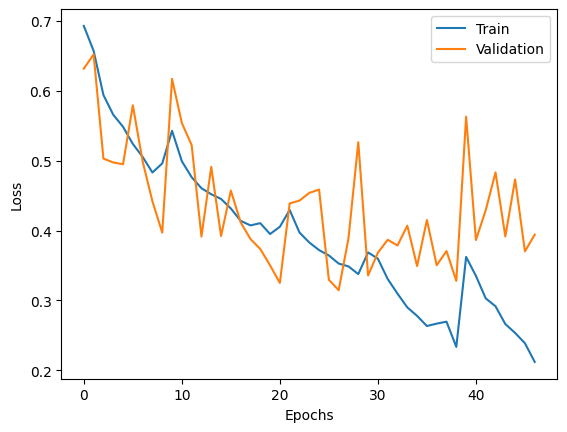

In [ ]:
plotx = hist.history['loss']
plotty = hist.history['val_loss']
plt.plot(plotx)
plt.plot(plotty)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
# y_predtrain = MLP.predict(X_trainrs, verbose=0)
# y_predtrain = np.argmax(y_predtrain, axis=1)
# cm2 = confusion_matrix(np.argmax(y_train, axis=1), y_predtrain)
# disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0,1])
# disp2.plot()
# plt.show()
# print("F1 ->", f1_score(np.argmax(y_train, axis=1), y_predtrain))

In [ ]:
from sklearn.metrics import f1_score
y_pred = CNN.predict(X_testrs, verbose=0)
y_pred = np.argmax(y_pred, axis=1)
CNN.evaluate(X_testrs, y_test, verbose=1)
y_comp = np.argmax(y_test, axis=1)
print("F1 ->", f1_score(y_comp, y_pred))
print("Balanced ACC ->", balanced_accuracy_score(y_comp, y_pred))
cm = confusion_matrix(y_comp, y_pred)
print(cm)

40/40 [==============================] - 0s 7ms/step - loss: 0.3034 - accuracy: 0.8553
F1 -> 0.4929971988795518
Balanced ACC -> 0.7038324439256233
[[982  90]
 [ 91  88]]


In [ ]:
counter = 0
for i in range(len(y_comp)):
    if(y_pred[i] != y_comp[i]):
        counter+=1
counter

181

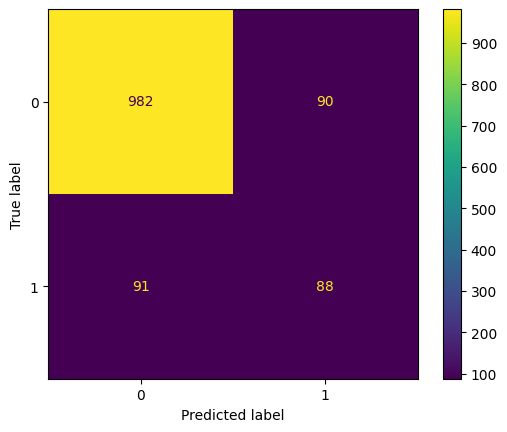

In [ ]:
cm = confusion_matrix(y_comp, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()


# Valores finais a prever

In [ ]:
X_testfinal = np.load("Dados/Xtest_Classification1.npy")
X_testfinal = X_testfinal.astype('float32')/255.0
X_testfinal = X_testfinal.reshape(-1, 28,28,3)  
y_final = CNN.predict(X_testfinal, verbose=0)
y_final = np.argmax(y_final, axis=1)
np.save("Dados/yfinal_Classification1.npy", y_final)


In [ ]:
# counter1 = 0
# counter0 = 0
# for i in y_final:
#     if i == 1: 
#         counter1 += 1
#     if i == 0:
#         counter0 +=1
# print(counter0)
# print(counter1)